<a href="https://colab.research.google.com/github/EduardoAcostaC/Simulacion-I/blob/main/MonteCarlo_AciertoError.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Monte Carlo de Acierto y Error
--------------
El método de Monte Carlo de acierto y error es una técnica que usa simulaciones aleatorias para resolver problemas complejos. Básicamente, se generan números aleatorios dentro de un espacio definido y se evalúa si cumplen ciertas condiciones. A partir de estos "aciertos", se estima la solución del problema.

 **Descripción básica:**
*   Generación de números aleatorios: Se generan números aleatorios que simulan posibles resultados del problema o sistema que estamos estudiando.
*   Evaluación de los resultados: Cada uno de esos resultados se evalúa según una función o regla que define la solución del problema.
* Promedio de los resultados: El valor final es el promedio de los resultados obtenidos, que proporciona una estimación del valor real o esperado.

Este método se usa cuando las soluciones exactas a los problemas son complicadas o imposibles de obtener de manera directa.

Estimación de la integral: 0.6275
Error de la estimación +/-: 0.0019


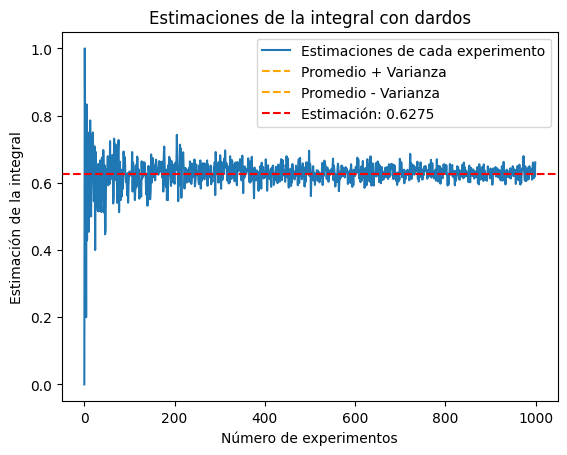

In [37]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt

# Definir la función
def f(x):
    return np.sqrt(np.arctan(x))

# Función para calcular la estimación con los dardos
def dardos(n):
    exitos = 0  #}
    for i in range(n):
        u1 = rd.random()
        u2 = rd.random()
        # Verificamos si el dardo cae por debajo de la curva
        if u2 <= f(u1):
            exitos += 1
    prob = exitos / n
    return prob

# Realizar una simulación con dardos
def experimento(m):
    estimaciones = []
    for i in range(1, m + 1):
        d = dardos(i)  # Realizar un lanzamiento de dardos para cada experimento
        estimaciones.append(d)
    return estimaciones

N = 1000  # Número de experimentos

l = experimento(N)

# Calcular el promedio y varianza
promedio = np.sum(l) / N
varianza = np.var(l)

# Graficar las estimaciones de cada experimento
plt.plot(l, label='Estimaciones de cada experimento')

# Graficar el intervalo de confianza (promedio ± varianza )
plt.plot(promedio + varianza, label='Promedio + Varianza ', color='orange', linestyle='--')
plt.plot(promedio - varianza, label='Promedio - Varianza ', color='orange', linestyle='--')

# Línea roja para indicar la estimación  (integral)
plt.axhline(promedio, color='red', linestyle='--', label=f'Estimación: {promedio:.4f}')

# Etiquetas y leyenda
plt.title('Estimaciones de la integral con dardos')
plt.xlabel('Número de experimentos')
plt.ylabel('Estimación de la integral')
plt.legend()

print(f"Estimación de la integral: {promedio:.4f}")
print(f"Error de la estimación +/-: {varianza:.4f}")
plt.show()
